In [6]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("../results/outputs/encoded_data.csv")

# View first few rows
df.head()

# Select numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)


Index(['Unnamed: 0', 'year', 'selling_price', 'km_driven', 'transmission',
       'owner'],
      dtype='object')


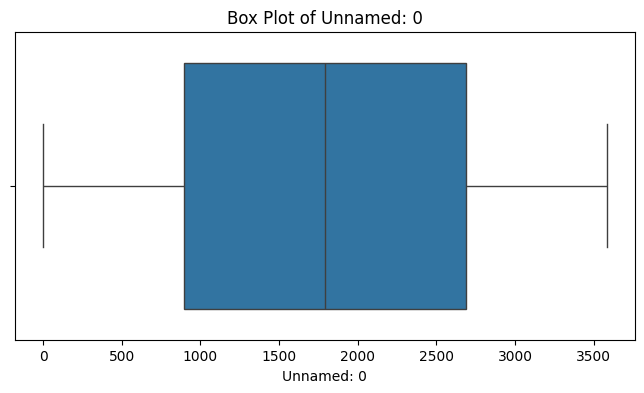

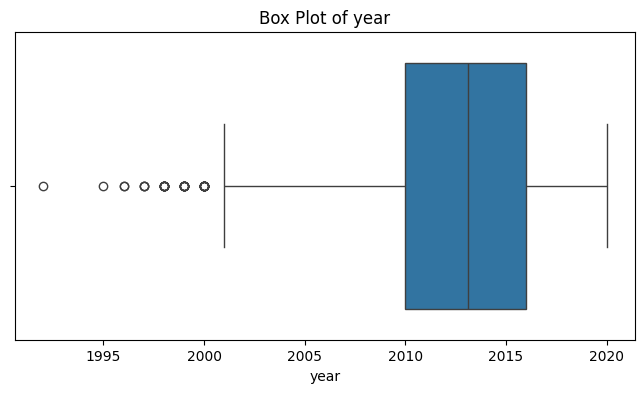

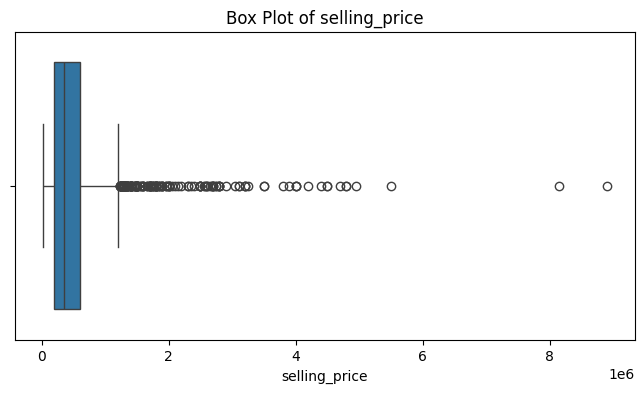

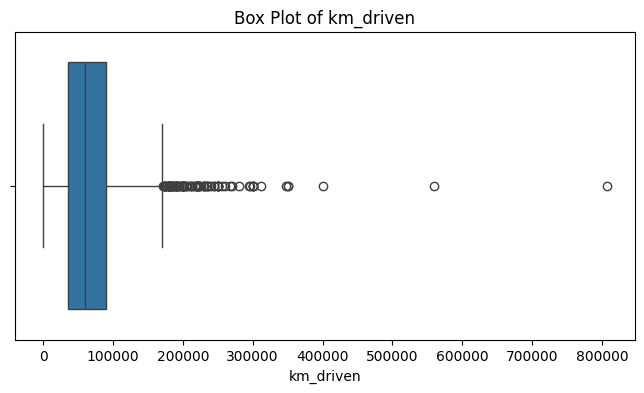

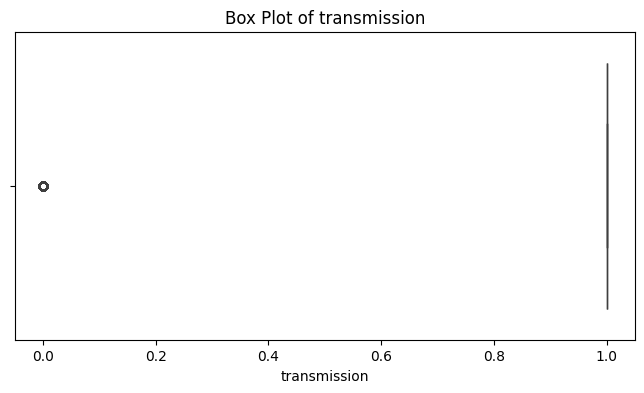

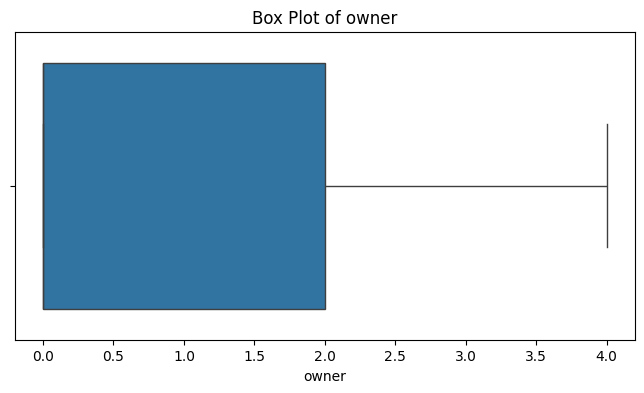

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.savefig('../results/eda_visualizations/outliers_before.png')
    plt.show()

In [18]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower={lower_bound}, Upper={upper_bound}")



Unnamed: 0: Lower=-1791.0, Upper=5373.0
year: Lower=2001.0, Upper=2025.0
selling_price: Lower=-400000.0, Upper=1200000.0
km_driven: Lower=-45000.0, Upper=171000.0
transmission: Lower=1.0, Upper=1.0
owner: Lower=-3.0, Upper=5.0


In [19]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check new shape
print("New dataset shape after outlier removal:", df.shape)


New dataset shape after outlier removal: (3063, 13)


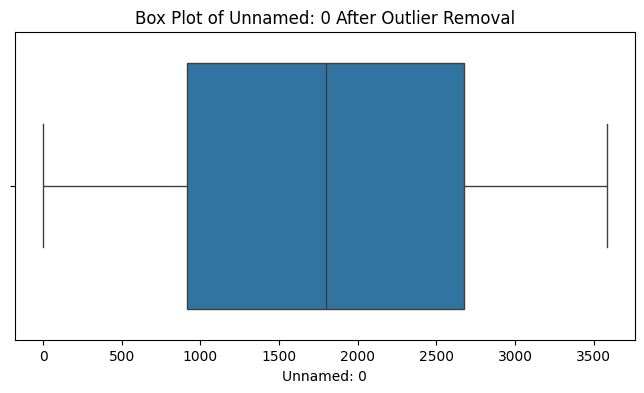

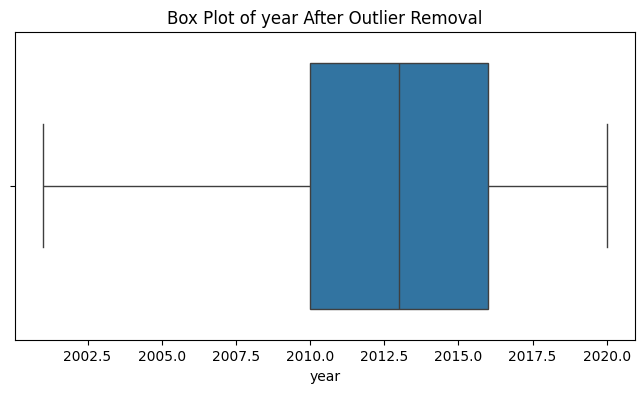

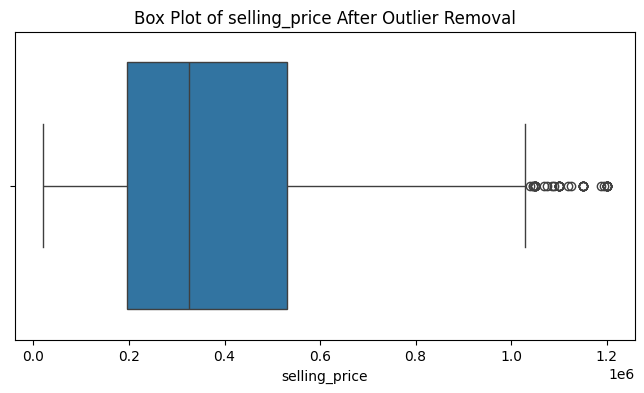

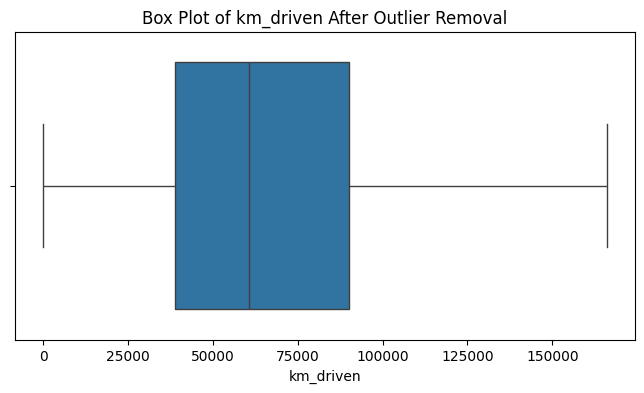

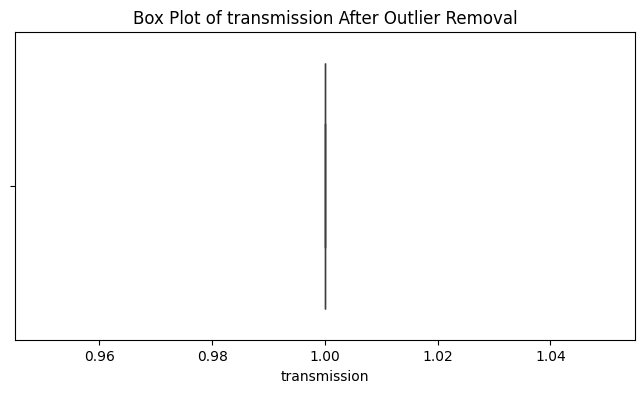

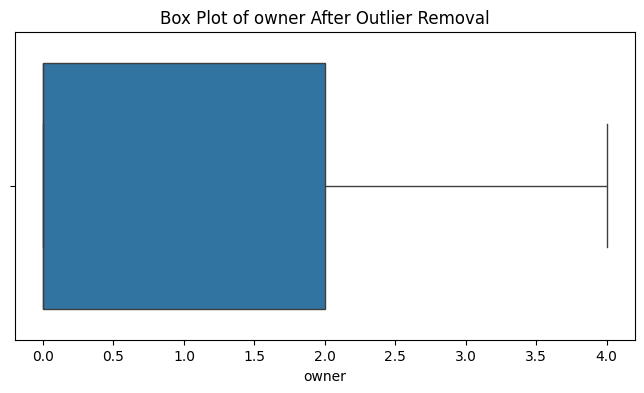

In [21]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} After Outlier Removal')
    plt.savefig('../results/eda_visualizations/outliers_after.png')
    plt.show()


In [28]:
df.to_csv("../results/outputs/outliers_removal.csv",index = False)